# MORTALITY PREDICTION TRAINING

In [62]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
SEED = 42

In [12]:
TRAIN_SET_PATH = os.path.join('..', 'datasets', 'mort_pred_train.csv')
TEST_SET_PATH = os.path.join('..', 'datasets', 'mort_pred_test.csv')

In [20]:
train_df = pd.read_csv(TRAIN_SET_PATH, index_col=None)
test_df = pd.read_csv(TEST_SET_PATH, index_col=None)

### Feature Scaling

In [21]:
num_cols = ['EDAD', 'DIAS_SINTOMAS']

In [22]:
scaler = StandardScaler().fit(train_df[num_cols])
train_df[num_cols] = scaler.transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

In [23]:
train_df

,SEXO,PAC_HOSPITALIZADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,DIAS_SINTOMAS,FALLECIDO
0,1,0,0,-0.635606,0,0,0,0,0,0,0,0,0,0,-0.905514,0
1,0,0,0,-0.806863,0,0,0,0,0,0,0,0,0,0,0.157481,0
2,1,0,0,-0.592792,0,0,0,0,0,0,0,1,0,0,-0.905514,0
3,1,0,0,-1.363449,0,0,0,0,0,0,0,0,0,0,-0.196851,0
4,0,0,0,-1.406263,0,0,0,0,0,0,0,0,0,0,-0.905514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,1,1,0,1.034151,0,1,0,0,0,1,1,0,0,0,0.511812,1
2471,1,1,0,-0.935306,0,0,0,0,0,0,0,0,0,0,-0.905514,1
2472,1,1,1,1.119780,0,1,0,0,0,1,0,0,0,0,-0.905514,1
2473,0,1,1,-0.892492,0,0,0,0,0,0,0,0,0,0,-0.551183,1


### Preparing Data

In [26]:
X_tr, y_tr = train_df.drop(['FALLECIDO'], axis='columns', inplace=False), train_df['FALLECIDO']
X_ts, y_ts = test_df.drop(['FALLECIDO'], axis='columns', inplace=False), test_df['FALLECIDO']

## Model Training

In [63]:
# For replicability purposes
tf.random.set_seed(SEED)

In [64]:
input_shape = X_tr.shape[1]
input_shape

15

In [65]:
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[input_shape]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [66]:
history = model.fit(X_tr, y_tr, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10
99/99 [==============================] - 3s 12ms/step - loss: 0.5910 - accuracy: 0.8035 - val_loss: 0.5172 - val_accuracy: 0.8404
Epoch 2/10
99/99 [==============================] - 1s 6ms/step - loss: 0.4816 - accuracy: 0.8626 - val_loss: 0.4179 - val_accuracy: 0.8606
Epoch 3/10
99/99 [==============================] - 1s 6ms/step - loss: 0.3860 - accuracy: 0.8949 - val_loss: 0.3680 - val_accuracy: 0.8707
Epoch 4/10
99/99 [==============================] - 1s 6ms/step - loss: 0.3147 - accuracy: 0.9126 - val_loss: 0.3428 - val_accuracy: 0.8707
Epoch 5/10
99/99 [==============================] - 1s 8ms/step - loss: 0.2624 - accuracy: 0.9232 - val_loss: 0.3017 - val_accuracy: 0.8869
Epoch 6/10
99/99 [==============================] - 1s 7ms/step - loss: 0.2222 - accuracy: 0.9364 - val_loss: 0.2643 - val_accuracy: 0.8949
Epoch 7/10
99/99 [==============================] - 1s 8ms/step - loss: 0.1901 - accuracy: 0.9485 - val_loss: 0.2253 - val_accuracy: 0.9172
Epoch 8/10
99/99 [=

In [71]:
foo = pd.DataFrame(history.history)
foo

,loss,accuracy,val_loss,val_accuracy
0,0.590966,0.803535,0.517211,0.840404
1,0.481551,0.862626,0.417897,0.860606
2,0.386035,0.894949,0.367973,0.870707
3,0.314653,0.912626,0.342810,0.870707
4,0.262429,0.923232,0.301684,0.886869
5,0.222226,0.936364,0.264302,0.894949
6,0.190070,0.948485,0.225252,0.917172
7,0.163501,0.961111,0.192557,0.933333
8,0.142096,0.966667,0.161043,0.945455
9,0.125266,0.973232,0.135770,0.955556


## Model Evaluation

### Learning Curves

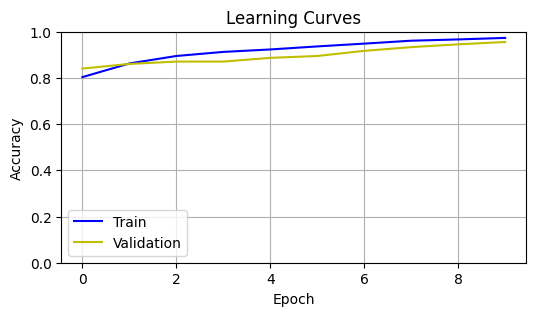

In [67]:
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], 'b', label='Train')
plt.plot(history.history['val_accuracy'], 'y', label='Validation')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.legend()
plt.show()

### Metric Evaluation

In [55]:
from sklearn.metrics import classification_report as clfn_rep
from sklearn.metrics import confusion_matrix as conf_mx

In [56]:
probs = model.predict(X_ts)

7/7 [==============================] - 0s 11ms/step


#### Threshold = 0.5

In [88]:
preds_50 = np.where(probs > 0.5, 1, 0)

In [89]:
results_50 = clfn_rep(y_ts, preds_50, target_names=['Survives', 'Dies'])
print(results_50)

              precision    recall  f1-score   support

    Survives       0.99      0.96      0.97       121
        Dies       0.94      0.99      0.97        86

    accuracy                           0.97       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207



In [92]:
def conf_mx_df(y_true, y_pred, target_names):
    mx = conf_mx(y_ts, preds_50)
    tuples_index = [('Actual', name) for name in target_names]
    tuples_columns = [('Predicted', name) for name in target_names]
    index = pd.MultiIndex.from_tuples(tuples_index)
    columns = pd.MultiIndex.from_tuples(tuples_columns)
    return pd.DataFrame(mx, index=index, columns=columns)

In [93]:
conf_mx_df(y_ts, preds_50, ['Survives', 'Dies'])

Predicted     
                 Survives Dies
Actual Survives       116    5
       Dies             1   85